# Import Library

In [1]:
import numpy as np
import pandas as pd 
import keras
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("../input"))


Using TensorFlow backend.


['test1.zip', 'train', '.gitignore', 'train.zip', 'test1', 'dogs-vs-cats.zip', 'sampleSubmission.csv']


# Define Constants

In [2]:
# assign FAST_RUN=True to train the model with three epochs
FAST_RUN = False

# input image dimensions
IMAGE_WIDTH=128
IMAGE_HEIGHT=128
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)

# red, green and blue channels
IMAGE_CHANNELS=3

# Prepare Traning Data

In [3]:
# get a list of file names from the train folder
filenames = os.listdir("../input/train/train")
filenames

['dog.10381.jpg',
 'cat.508.jpg',
 'cat.1491.jpg',
 'cat.10611.jpg',
 'cat.238.jpg',
 'cat.10012.jpg',
 'dog.11894.jpg',
 'dog.3756.jpg',
 'cat.12498.jpg',
 'cat.8718.jpg',
 'cat.1130.jpg',
 'dog.9470.jpg',
 'cat.11346.jpg',
 'dog.6008.jpg',
 'dog.10695.jpg',
 'dog.3105.jpg',
 'dog.10586.jpg',
 'cat.7860.jpg',
 'dog.695.jpg',
 'dog.2231.jpg',
 'cat.8937.jpg',
 'cat.9880.jpg',
 'dog.2267.jpg',
 'cat.5551.jpg',
 'dog.7312.jpg',
 'dog.9302.jpg',
 'cat.5905.jpg',
 'dog.11796.jpg',
 'cat.10195.jpg',
 'cat.8683.jpg',
 'cat.11290.jpg',
 'cat.5377.jpg',
 'cat.11504.jpg',
 'cat.11999.jpg',
 'dog.11763.jpg',
 'cat.9385.jpg',
 'dog.873.jpg',
 'cat.5031.jpg',
 'dog.3000.jpg',
 'dog.7947.jpg',
 'dog.11836.jpg',
 'cat.8505.jpg',
 'dog.2936.jpg',
 'cat.8777.jpg',
 'cat.3092.jpg',
 'dog.6496.jpg',
 'cat.11005.jpg',
 'dog.9131.jpg',
 'cat.3534.jpg',
 'dog.11071.jpg',
 'dog.1465.jpg',
 'dog.1636.jpg',
 'dog.3747.jpg',
 'dog.3594.jpg',
 'dog.6093.jpg',
 'cat.9063.jpg',
 'cat.7430.jpg',
 'cat.10845.jpg',


In [4]:
# an empty list which will contain all the labels of the train images.
# for example: for cat.8937.jpg- 0 will be appended to the list. for dog.695.jpg- 1 will be 
# appended to the list
categories = []
for filename in filenames:
    
    # split the filename using delimiter '.'.
    # for example, 'cat.8937.jpg' will be splitted into 'cat','8937','jpg'. we will take the
    # first string 'cat' as the category of that image
    category = filename.split('.')[0]
    
    # We will label all the images with dog photos as 1's and cat photos as 0's
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

# we will create a dataframe which will contain the filenames and the labels of our train set
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})

In [5]:
df.head()

,filename,category
0,dog.10381.jpg,1
1,cat.508.jpg,0
2,cat.1491.jpg,0
3,cat.10611.jpg,0
4,cat.238.jpg,0


In [6]:
df.tail()

,filename,category
24995,dog.10628.jpg,1
24996,cat.9868.jpg,0
24997,dog.1441.jpg,1
24998,dog.10308.jpg,1
24999,dog.11479.jpg,1


### See Total In count

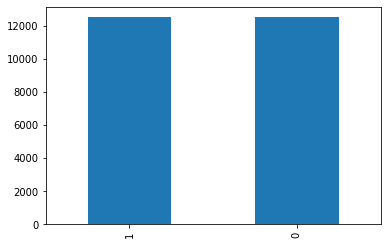

In [7]:
# create a barplot showing the amount of cat and dog pictures
df['category'].value_counts().plot.bar()

From our data we have 12000 cats and 12000 dogs

# See sample image

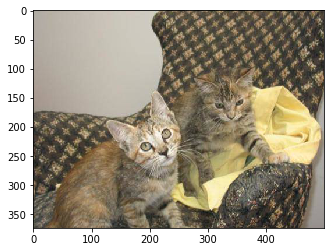

In [8]:
# randomly choose an image for display
sample = random.choice(filenames)
image = load_img("../input/train/train/"+sample)
plt.imshow(image)

# Build Model

<img src="https://i.imgur.com/ebkMGGu.jpg" width="100%"/>

* **Input Layer**: It represent input image data. It will reshape image into single diminsion array. Example your image is 64x64 = 4096, it will convert to (4096,1) array.
* **Conv Layer**: This layer will extract features from image.
* **Pooling Layer**: This layerreduce the spatial volume of input image after convolution.
* **Fully Connected Layer**: It connect the network from a layer to another layer
* **Output Layer**: It is the predicted values layer. 

In [9]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation, BatchNormalization

model = Sequential()

# layer 1
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#layer 2
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#layer 3
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

#fully connected layer
model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(2, activation='softmax')) # 2 because we have cat and dog classes

##### my understanding on the last layer:
we will use a softmax activation on the last layer when we have categorical dependent variable. otherwise, we will use a normal dense layer

In [10]:
model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization_1 (Batch (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 63, 63, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_2 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)       

##### my understanding on loss function:
we will use categorical cross entropy for categorical output. we will use mean squared error for non-categorical output.
##### my understanding on optimizer:
we will use Root Mean Square Propogation for categorical output. For non-categorical output, we will use adam optimization.
##### my understanding on performance metrics:
we will use accuracy for categorical output. We will use mean absolute error for non-categorical output

# Callbacks

In [11]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [12]:
earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then validation accuracy not increase for 2 steps

In [13]:
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [15]:
callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [16]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [17]:
# do a train-validation split on the whole set.
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)

# drop the indexes of train and validation dataframe
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

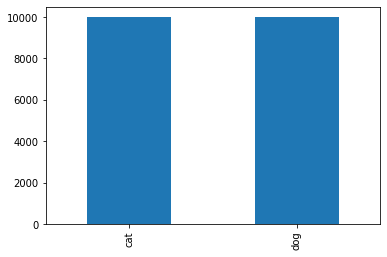

In [18]:
# see the amount of cat and dog photos in the train dataframe
train_df['category'].value_counts().plot.bar()

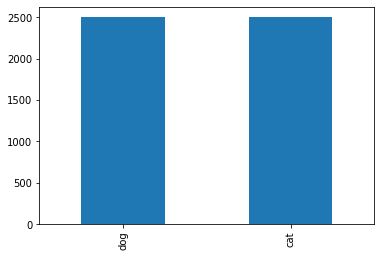

In [19]:
# see the amount of cat and dog photos in the train dataframe
validate_df['category'].value_counts().plot.bar()

In [20]:
# get the total amount of data in train and validation set
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]

# set the minibatch size to 15
batch_size=15

# Traning Generator

In [21]:
# ImageDataGenerator?

In [22]:
#  Generate batches of tensor image data with real-time data augmentation.
#  The data will be looped over (in batches)

# Degree range for random rotations is 15
# rescaling factor is 1/255, meaning that the image pixel values will be multiplied by 1/255
# Shear angle in counter-clockwise direction in degrees is 0.1
# Range for random zoom is 0.2
# Randomly flip inputs horizontally
# width_shift_range 0.1 fraction of total width
# height_shift_range 0.1 fraction of total height
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

In [23]:
# train_datagen.flow_from_dataframe?

In [24]:
# Takes the dataframe and the path to a directory
#  and generates batches of augmented/normalized data.

# target_size: The dimensions to which all images found will be resized
train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    "../input/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### Validation Generator

In [25]:
# we will definitely not need to zoom, shear, or any kind of bullshit to increase validation
# set but we will divide the pixel values by 255

validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "../input/train/train/",
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


# See how our generator work

In [26]:
# here we will create a dataframe with one row from the training dataframe for demonstrating
# how the datagenerator works
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "../input/train/train/", 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


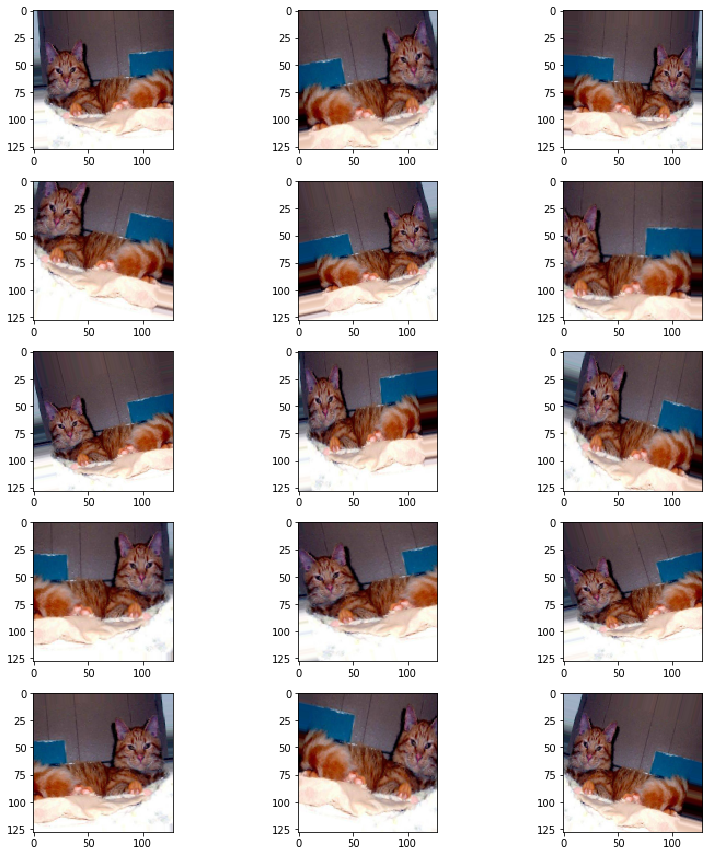

In [27]:
# we will generate 15 random image from our example data generator and show them using
# matplotlib
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    #on each iteration of the for loop, the generator returns the same amount of random 
    #images as the original dataframe on which the generator was created
    for X_batch, Y_batch in example_generator:
        #get the first image of the generated batch
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Seem to be nice 

# Fit Model

Uncomment the following cell to run training

In [28]:
if(os.path.isfile('saved_model/history.csv') and pd.read_csv('saved_model/history.csv').shape[0]>0):
    iteration_to_be_loaded=pd.read_csv('saved_model/history.csv').shape[0]-1
    model.load_weights("saved_model/model_"+str(iteration_to_be_loaded)+".h5")
    print("saved_model/model_"+str(iteration_to_be_loaded)+".h5"+" loaded!")

saved_model/model_3.h5 loaded!


In [ ]:
epochs=3 if FAST_RUN else 50
history = model.fit(
    train_generator, 
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

In [ ]:
assert(False)

# Save Model

In [ ]:
# model.save_weights("saved_model/model.h5")

# import pickle
# with open('saved_model/history.pickle', 'wb') as f:
#     pickle.dump(history, f)

In [ ]:
model.load_weights("saved_model/model.h5")

In [ ]:
import pickle
with open('saved_model/history.pickle','rb') as f:
    history = pickle.load(f)

# Visualize Training

In [ ]:
# create a figure with two subplots in 2 rows and one column
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))

#draw losses on the first subplot
# plot the training loss
ax1.plot(history.history['loss'], color='b', label="Training loss")
#plot the validation loss
ax1.plot(history.history['val_loss'], color='r', label="validation loss")

ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

#draw accuracy on the second subplot
# training accuracy
ax2.plot(history.history['accuracy'], color='b', label="Training accuracy")
# validation accuracy
ax2.plot(history.history['val_accuracy'], color='r',label="Validation accuracy")

ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [ ]:
test_filenames = os.listdir("../input/test1/test1")
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# Create Testing Generator

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)

#remember to not shuffle the test set
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    "../input/test1/test1/", 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

# Predict

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

In [ ]:
predict

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

In [ ]:
test_df['category']

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

In [ ]:
test_df['category']

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### Visualize Result

In [ ]:
test_df['category'].value_counts().plot.bar()

### See predicted result with images

In [ ]:
sample_test = test_df.head(18)
sample_test.head(18)

In [ ]:
plt.figure(figsize=(12, 24))

# iterrows() will return index and each row of a dataframe
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img("../input/test1/test1/"+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

# Submission

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
# I added this line
submission_df=submission_df.astype({'id': 'int32'})
submission_df=submission_df.sort_values('id',ascending=True)

submission_df.to_csv('submission.csv', index=False)